# Klasyfikacja jakości czerwonego wina <a class="tocSkip">
'''Hubert Łapsa
Mateusz Wójcik'''

# Analiza danych <a class="analiza">
## Usuwanie części danych (problem brakujących danych)

In [ ]:
import pandas as pd

df = pd.read_csv("winequality-red.csv")
#Fukcja obliczająca procent z danego parametru
def percentage(part, whole):
   return (float(part) * float(whole))/100

#Obliczenie ilości danych do usunięcia
rnd = int(percentage(15, df['citric acid'].size))

#Losowanie danych do usunięcia
data = df['citric acid'].head(len(df)).sample(rnd)

#Zastępowanie wylosowanych danych wartościami pustymi
for el in data.index[0:rnd][0:rnd]:
   df.loc[el, 'citric acid'] = ''

#Zapis danych do pliku csv
#df.to_csv('data_after_delete_some_records.csv')

## Problem danych niezrównoważonych

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
red_wines = pd.read_csv('winequality-red.csv')
red_wines.head()


X = red_wines.iloc[:, :-1]
Y = red_wines.iloc[:, -1:]

# Balans danych
sns.countplot(x='quality', data=red_wines)
plt.show()

# Analiza danych odstających
for column in X:
    sns.boxplot(x='quality', y=column, data=red_wines)
    plt.show()

In [ ]:
# Histogram danych nierównoważonych
sns.set(color_codes=True)
sns.distplot(Y, kde=False, bins=6)

In [ ]:
# łączenie klas
red_wines = red_wines.replace(8, 7)
red_wines = red_wines.replace(3, 4)

X = red_wines.iloc[:, :-1]
Y = red_wines.iloc[:, -1:]

sns.set(color_codes=True)
sns.distplot(Y, kde=False, bins=4)

In [ ]:
# usunięcie nadmiaru danych
red_wines = red_wines.drop(red_wines.query('quality == 5').sample(frac=.5).index)
red_wines = red_wines.drop(red_wines.query('quality == 6').sample(frac=.5).index)
X = red_wines.iloc[:, :-1]
Y = red_wines.iloc[:, -1:]

sns.set(color_codes=True)
sns.distplot(Y, kde=False, bins=4)

# duplikacja danych
from imblearn.over_sampling import SMOTE
smote = SMOTE("minority")
X, Y = smote.fit_sample(X, Y)
sns.distplot(Y, kde=False, bins=6)

frames = [X, Y]
red_wines = pd.concat(frames)
# red_wines.to_csv("red_wines_after_over_sampling.csv")

red_wines = pd.read_csv("data.csv")
X = red_wines.iloc[:, :-1]
Y = red_wines.iloc[:, -1:]

red_wines.isnull()

In [ ]:
# Analiza danych odstających
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

((red_wines < (Q1 - 1.5 * IQR)) | (red_wines > (Q3 + 1.5 * IQR))).sum()

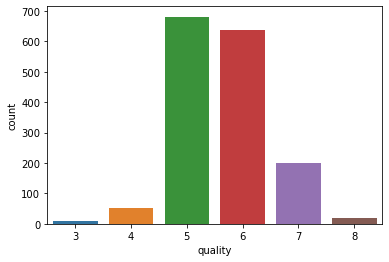

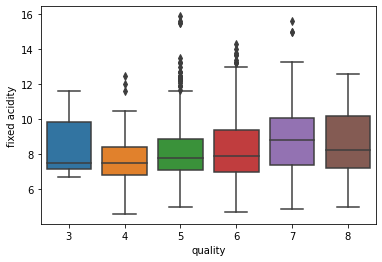

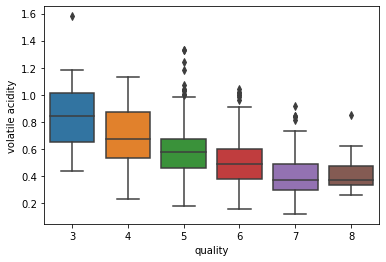

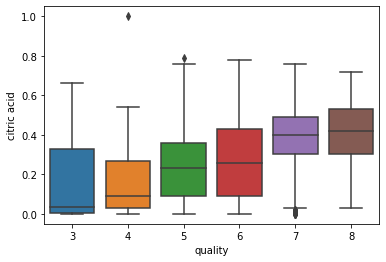

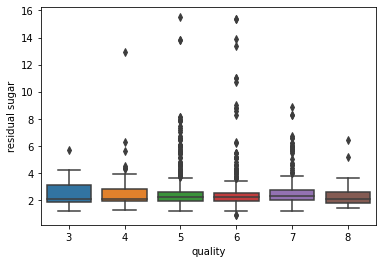

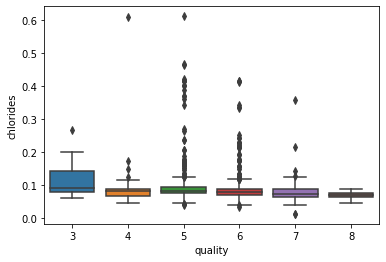

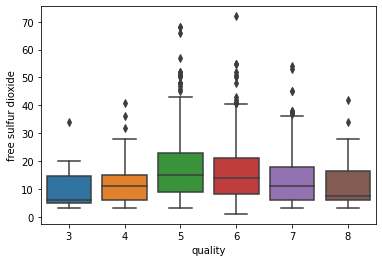

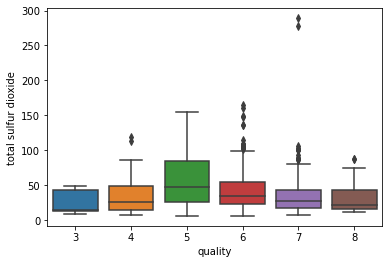

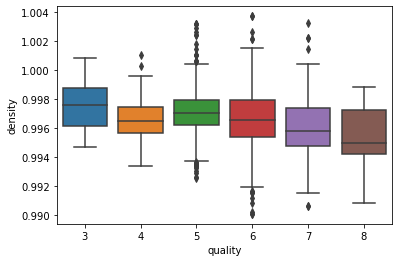

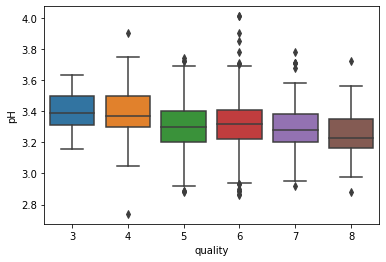

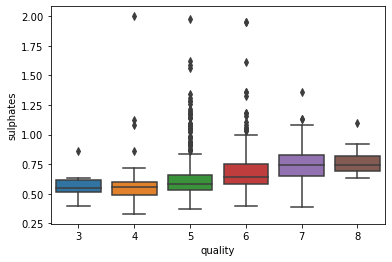

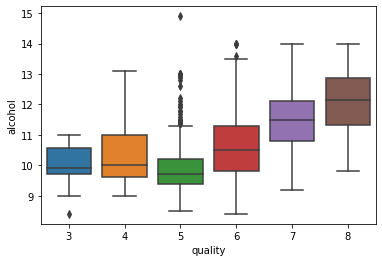

In [6]:
red_wines = pd.read_csv('winequality-red.csv')
red_wines.head()


X = red_wines.iloc[:, :-1]
Y = red_wines.iloc[:, -1:]

# Balans danych
sns.countplot(x='quality', data=red_wines)
plt.show()

# Analiza danych odstających
for column in X:
    sns.boxplot(x='quality', y=column, data=red_wines)
    plt.show()

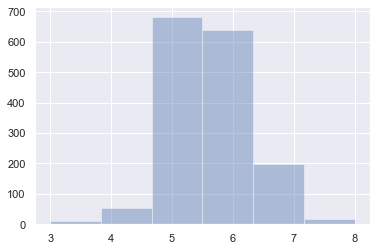

In [7]:
# Histogram danych nierównoważonych
sns.set(color_codes=True)
sns.distplot(Y, kde=False, bins=6)

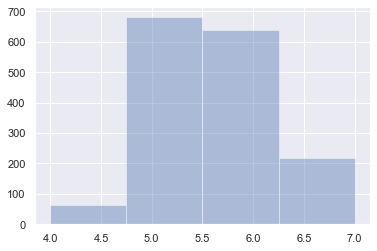

In [8]:
# łączenie klas
red_wines = red_wines.replace(8, 7)
red_wines = red_wines.replace(3, 4)

X = red_wines.iloc[:, :-1]
Y = red_wines.iloc[:, -1:]

sns.set(color_codes=True)
sns.distplot(Y, kde=False, bins=4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1213,False,False,False,False,False,False,False,False,False,False,False,False
1214,False,False,False,False,False,False,False,False,False,False,False,False
1215,False,False,False,False,False,False,False,False,False,False,False,False
1216,False,False,False,False,False,False,False,False,False,False,False,False


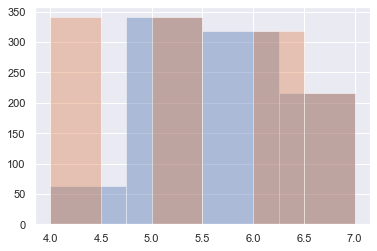

In [9]:
# usunięcie nadmiaru danych
red_wines = red_wines.drop(red_wines.query('quality == 5').sample(frac=.5).index)
red_wines = red_wines.drop(red_wines.query('quality == 6').sample(frac=.5).index)
X = red_wines.iloc[:, :-1]
Y = red_wines.iloc[:, -1:]

sns.set(color_codes=True)
sns.distplot(Y, kde=False, bins=4)

# duplikacja danych
from imblearn.over_sampling import SMOTE
smote = SMOTE("minority")
X, Y = smote.fit_sample(X, Y)
sns.distplot(Y, kde=False, bins=6)

frames = [X, Y]
red_wines = pd.concat(frames)
# red_wines.to_csv("red_wines_after_over_sampling.csv")

red_wines = pd.read_csv("data.csv")
X = red_wines.iloc[:, :-1]
Y = red_wines.iloc[:, -1:]

red_wines.isnull()

In [10]:
# Analiza danych odstających
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

((red_wines < (Q1 - 1.5 * IQR)) | (red_wines > (Q3 + 1.5 * IQR))).sum()

alcohol                  12
chlorides                85
citric acid               2
density                  28
fixed acidity            35
free sulfur dioxide      27
pH                       23
quality                   0
residual sugar          150
sulphates                51
total sulfur dioxide     48
volatile acidity         15
dtype: int64